In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
data_train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')
data_test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')
data_train.head()

D:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
def drop_low_colums(df):
    data_corr=df.corr()
    d_list=data_corr[data_corr.SalePrice<0.5].index.tolist()
    return d_list

data_train=data_train.drop(['YearBuilt','1stFlrSF'], axis=1)
data_test=data_test.drop(['YearBuilt','1stFlrSF'], axis=1)
data_drop_train=data_train.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)
data_drop_test=data_test.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)
drop_list=drop_low_colums(data_drop_train)
data_drop_train1=data_drop_train.drop(drop_list, axis=1)
data_drop_test1=data_drop_test.drop(drop_list, axis=1)

In [4]:
data_drop_train1=data_drop_train1.fillna('0')
data_drop_test1=data_drop_test1.fillna('0')

In [5]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = data_drop_train1.select_dtypes(include=object).columns
   
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        df_train[feature] = le.fit_transform(df_train[feature])
        df_test[feature] = le.fit_transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(data_drop_train1, data_drop_test1)

In [6]:
data_drop_train2=data_train.corr()
drop_list2=list(data_drop_train2.query('SalePrice<0.5').index)
data_drop_train2=data_train.drop(drop_list2, axis=1)
data_drop_test2=data_test.drop(drop_list2, axis=1)

In [7]:
def change_colums(colums):
    fz=np.ceil(np.log2(colums.max()))
    return int(fz)
 
fz=change_colums(data_drop_train2.GarageArea)
data_drop_train2['GarageArea'] = pd.cut(data_drop_train2.GarageArea, fz)
fz=change_colums(data_drop_train2.GrLivArea)
data_drop_train2['GrLivArea'] = pd.cut(data_drop_train2.GrLivArea, fz)
fz=change_colums(data_drop_train2.TotalBsmtSF)
data_drop_train2['TotalBsmtSF'] = pd.cut(data_drop_train2.TotalBsmtSF, fz)
fz=change_colums(data_drop_train2.YearRemodAdd)
data_drop_train2['YearRemodAdd'] = pd.cut(data_drop_train2.YearRemodAdd, fz)

In [8]:
data_drop_test2["TotalBsmtSF"] = data_drop_test2["TotalBsmtSF"].astype("int64")
data_drop_test2["GarageArea"] = data_drop_test2["GarageArea"].astype("int64")
data_drop_test2["GrLivArea"] = data_drop_test2["GrLivArea"].astype("int64")
data_drop_test2["GarageCars"] = data_drop_test2["GarageCars"].astype("int64")
data_drop_test2.loc[data_drop_test2['YearRemodAdd'] == '0'] = int(data_drop_test2["YearRemodAdd"].mean())

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [9]:
fz=change_colums(data_drop_test2.YearRemodAdd)
data_drop_test2['YearRemodAdd'] = pd.cut(data_drop_test2.YearRemodAdd, fz)
fz=change_colums(data_drop_test2.TotalBsmtSF)
data_drop_test2['TotalBsmtSF'] = pd.cut(data_drop_test2.TotalBsmtSF,fz)
fz=change_colums(data_drop_test2.GarageArea)
data_drop_test2['GarageArea'] = pd.cut(data_drop_test2.GarageArea,fz)
fz=change_colums(data_drop_test2.GrLivArea)
data_drop_test2['GrLivArea'] = pd.cut(data_drop_test2.GrLivArea, fz)

In [10]:
def encode_features1(df_train, df_test):
    features = ['YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
 
data_train1, data_test1 = encode_features1(data_drop_train2, data_drop_test2)

In [11]:
from sklearn.model_selection import train_test_split
X=data_train1[['OverallQual', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]
y=data_train1['SalePrice']
#随机划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# 1.决策树回归
from sklearn import tree
model_decision_tree_regression = tree.DecisionTreeRegressor()
 
# 2.线性回归
from sklearn.linear_model import LinearRegression
model_linear_regression = LinearRegression()
 
# 3.SVM回归
from sklearn import svm
model_svm = svm.SVR()
 
# 4.kNN回归
from sklearn import neighbors
model_k_neighbor = neighbors.KNeighborsRegressor()
 
# 5.随机森林回归
from sklearn import ensemble
model_random_forest_regressor = ensemble.RandomForestRegressor(n_estimators=20)  # 使用20个决策树
 
# 6.Adaboost回归
from sklearn import ensemble
model_adaboost_regressor = ensemble.AdaBoostRegressor(n_estimators=50)  # 这里使用50个决策树
 
# 7.GBRT回归
from sklearn import ensemble
model_gradient_boosting_regressor = ensemble.GradientBoostingRegressor(n_estimators=100)  # 这里使用100个决策树
 
# 8.Bagging回归
from sklearn import ensemble
model_bagging_regressor = ensemble.BaggingRegressor()
 
# 9.ExtraTree极端随机数回归
from sklearn.tree import ExtraTreeRegressor
model_extra_tree_regressor = ExtraTreeRegressor()

In [13]:
def try_different_method(model, method):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    result = model.predict(X_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test, "go-", label="True value")
    plt.plot(np.arange(len(result)), result, "ro-", label="Predict value")
    plt.title(f"method:{method}---score:{score}")
    plt.legend(loc="best")

D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
D:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy 

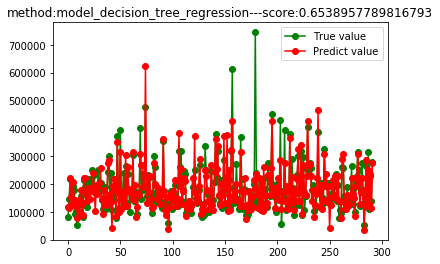

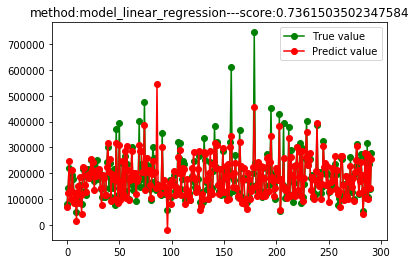

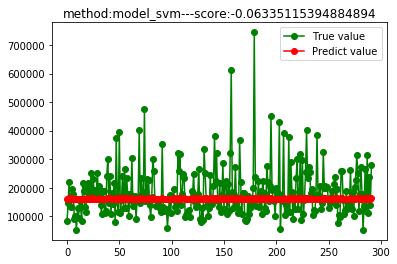

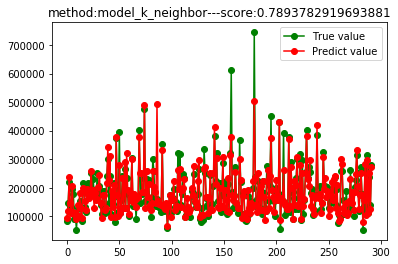

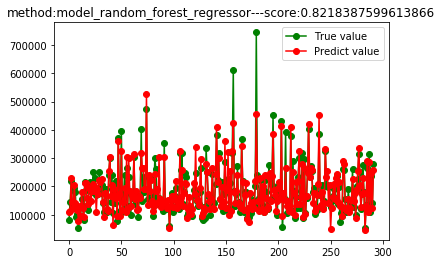

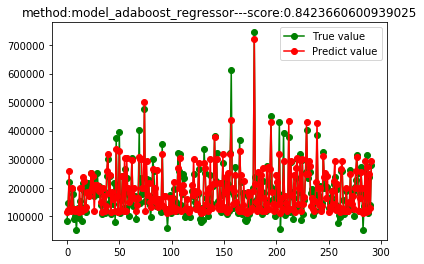

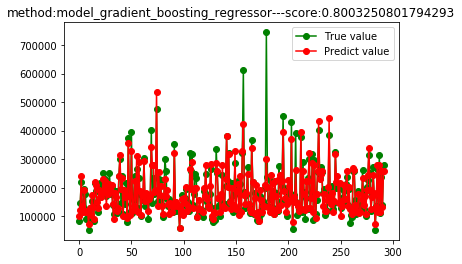

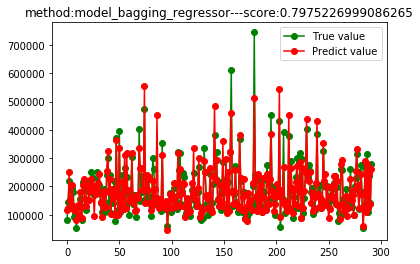

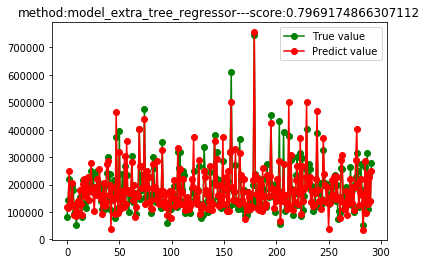

In [14]:
try_different_method(model_decision_tree_regression,"model_decision_tree_regression")
try_different_method(model_linear_regression,"model_linear_regression")
try_different_method(model_svm,"model_svm")
try_different_method(model_k_neighbor,"model_k_neighbor")
try_different_method(model_random_forest_regressor,"model_random_forest_regressor")
try_different_method(model_adaboost_regressor,"model_adaboost_regressor")
try_different_method(model_gradient_boosting_regressor,"model_gradient_boosting_regressor")
try_different_method(model_bagging_regressor,"model_bagging_regressor")
try_different_method(model_extra_tree_regressor,"model_extra_tree_regressor")

In [15]:
model_gradient_boosting_regressor.fit(X_train, y_train)
model_gradient_boosting_regressor_result = model_gradient_boosting_regressor.predict(data_test1)

In [21]:
submission=pd.DataFrame({'SalePrice':model_gradient_boosting_regressor_result})
submission.to_csv('submission.csv',index=False)